# Pyrimidines_Num Dataset

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score,silhouette_samples
from time import time

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#from sklearn.metrics import score

from pandas import read_csv
import pandas as pd
import numpy as np
import os
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB
from sklearn import  svm

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score


In [6]:
#Loading the dataset
pyrimidines_data = pd.read_csv('Pyrimidines_Num.csv')

In [7]:
# Size of the dataset
print("Size of the dataset: ", pyrimidines_data.shape)

# Printing the first few rows and column names
print(pyrimidines_data.head(), pyrimidines_data.columns, len(pyrimidines_data.columns))

Size of the dataset:  (13940, 3)
   id1  id2 activity
0  d02  d01    great
1  d03  d01    great
2  d04  d01    great
3  d05  d01    great
4  d06  d01    great Index(['id1', 'id2', 'activity'], dtype='object') 3


In [4]:
pyrimidines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id1       13940 non-null  object
 1   id2       13940 non-null  object
 2   activity  13940 non-null  object
dtypes: object(3)
memory usage: 326.8+ KB


In [5]:
pyrimidines_data.describe()

,id1,id2,activity
count,13940,13940,13940
unique,55,55,2
top,d02,d01,great
freq,270,270,6970


In [6]:
pyrimidines_data.isnull().sum()

id1         0
id2         0
activity    0
dtype: int64

In [7]:
pyrimidines_data.shape

(13940, 3)

In [8]:
pyrimidines_data['id1'].unique()

array(['d02', 'd03', 'd04', 'd05', 'd06', 'd07', 'd09', 'd10', 'd12',
       'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd21', 'd22',
       'd25', 'd26', 'd27', 'd28', 'd29', 'd32', 'd33', 'd35', 'd36',
       'd38', 'd40', 'd41', 'd43', 'd44', 'd45', 'd46', 'd47', 'd48',
       'd49', 'd50', 'd51', 'd52', 'd53', 'd54', 'd55', 'd01', 'd08',
       'd11', 'd20', 'd23', 'd24', 'd30', 'd31', 'd34', 'd37', 'd39',
       'd42'], dtype=object)

In [9]:
pyrimidines_data['id2'].unique()

array(['d01', 'd02', 'd03', 'd04', 'd05', 'd06', 'd07', 'd09', 'd10',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd21',
       'd22', 'd25', 'd26', 'd27', 'd28', 'd29', 'd32', 'd33', 'd35',
       'd36', 'd38', 'd40', 'd41', 'd43', 'd45', 'd46', 'd49', 'd53',
       'd54', 'd55', 'd48', 'd50', 'd44', 'd47', 'd51', 'd52', 'd08',
       'd11', 'd20', 'd23', 'd24', 'd30', 'd31', 'd34', 'd37', 'd39',
       'd42'], dtype=object)

In [10]:
pyrimidines_data['activity'].unique()

array(['great', 'less'], dtype=object)

In [11]:
# Encoding the categorical values
encoder=LabelEncoder()
for col in pyrimidines_data.columns:
    pyrimidines_data[col]=encoder.fit_transform(pyrimidines_data[col])
pyrimidines_data.head().T

,0,1,2,3,4
id1,1,2,3,4,5
id2,0,0,0,0,0
activity,0,0,0,0,0


In [12]:
pyrimidines_data['id1'].unique()

array([ 1,  2,  3,  4,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 20,
       21, 24, 25, 26, 27, 28, 31, 32, 34, 35, 37, 39, 40, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54,  0,  7, 10, 19, 22, 23, 29, 30,
       33, 36, 38, 41])

In [13]:
pyrimidines_data['id2'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18,
       20, 21, 24, 25, 26, 27, 28, 31, 32, 34, 35, 37, 39, 40, 42, 44, 45,
       48, 52, 53, 54, 47, 49, 43, 46, 50, 51,  7, 10, 19, 22, 23, 29, 30,
       33, 36, 38, 41])

In [14]:
pyrimidines_data['activity'].unique()

array([0, 1])

In [15]:
x = pyrimidines_data.drop('activity',axis=1)
y = pyrimidines_data['activity']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

## Decision Tree, Gradient Boosting and Random Forest Classifiers

In [17]:
NUM_POINTS = 2
feature_names= list(pyrimidines_data.columns[0:NUM_POINTS])
feature_names

['id1', 'id2']

In [18]:
decision_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
decision_tree = decision_tree.fit(x,y)
r = export_text(decision_tree, feature_names=feature_names)
print(r) # Rules from the Decision Tree

|--- id2 <= 27.50
|   |--- id1 <= 16.50
|   |   |--- id2 <= 9.50
|   |   |   |--- id1 <= 5.50
|   |   |   |   |--- class: 1
|   |   |   |--- id1 >  5.50
|   |   |   |   |--- class: 0
|   |   |--- id2 >  9.50
|   |   |   |--- class: 1
|   |--- id1 >  16.50
|   |   |--- id1 <= 23.50
|   |   |   |--- id2 <= 21.50
|   |   |   |   |--- class: 0
|   |   |   |--- id2 >  21.50
|   |   |   |   |--- class: 1
|   |   |--- id1 >  23.50
|   |   |   |--- class: 0
|--- id2 >  27.50
|   |--- id1 <= 38.50
|   |   |--- class: 1
|   |--- id1 >  38.50
|   |   |--- id2 <= 40.50
|   |   |   |--- class: 0
|   |   |--- id2 >  40.50
|   |   |   |--- class: 1



In [19]:
# Decision Tree Classifier

DTree = DecisionTreeClassifier(criterion = 'entropy', random_state=0) # Building a  model
clf1_DT = DTree.fit(x_train, y_train) # Training a  model
y_pred_DT =  DTree.predict(x_test) # Make predictions

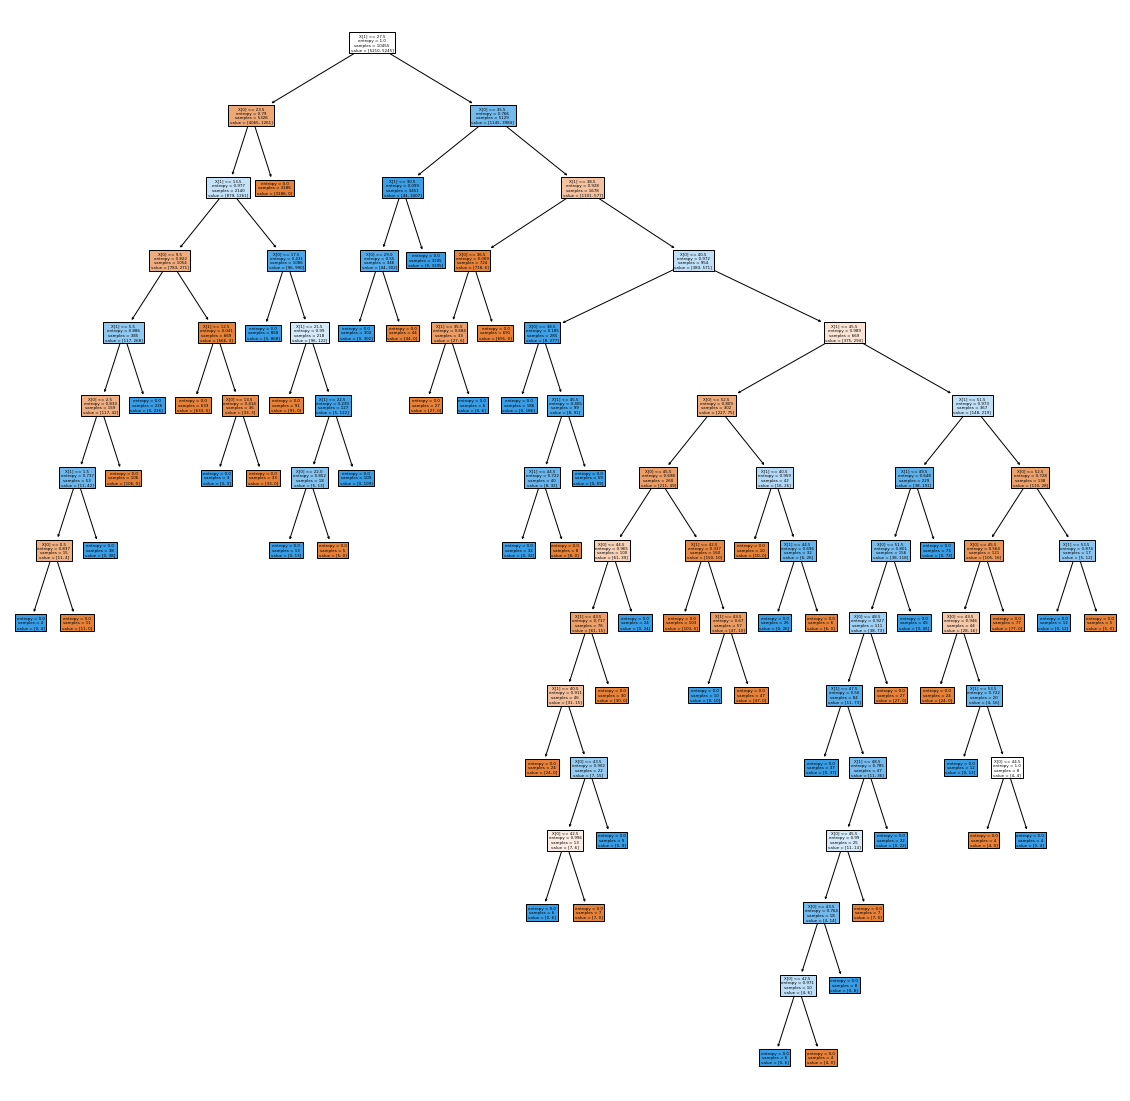

In [20]:
#  Visualize Decision Tree
plt.figure(figsize=(20,20))
plot_tree(clf1_DT, filled=True)
plt.show()

In [21]:
# # Graphviz used below for a better and clearer view :
# os.environ["PATH"] += os.pathsep + 'C:/Users/Swarnika/anaconda3/envs/nlp2021/Library/bin/graphviz/'

# dot_data1 = export_graphviz(clf1_DT, out_file=None)
# graph1 = graphviz.Source(dot_data1)
# graph1.render("Pyrimidines")

# # 1 is less, 0 is great
# dot_data1 = export_graphviz(clf1_DT, out_file=None, feature_names=feature_names, class_names=('Great','Less'), filled=True, rounded=True, special_characters=True)
# graph1 = graphviz.Source(dot_data1)
# graph1

Accuracy Score on train data: 1.0
Confusion Matrix of train data: 
  [[5210    0]
 [   0 5245]]
classification report on train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5210
           1       1.00      1.00      1.00      5245

    accuracy                           1.00     10455
   macro avg       1.00      1.00      1.00     10455
weighted avg       1.00      1.00      1.00     10455



C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


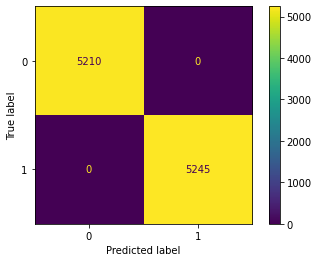

Accuracy Score on test data:   1.0
Confusion Matrix of test data:
 [[1760    0]
 [   0 1725]]
classification report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00      1725

    accuracy                           1.00      3485
   macro avg       1.00      1.00      1.00      3485
weighted avg       1.00      1.00      1.00      3485



C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


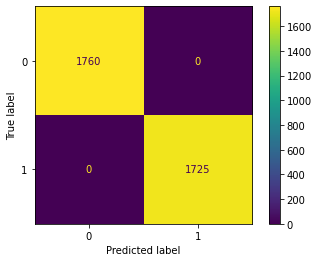

In [22]:
# Decision Tree Classifier 

# Evaluate the model on the train dataset
print('Accuracy Score on train data:', accuracy_score(y_true=y_train, y_pred=DTree.predict(x_train))) # Accuracy
print('Confusion Matrix of train data: \n ', confusion_matrix(y_true=y_train, y_pred=DTree.predict(x_train))) # ConfusionMatrix
print('classification report on train data')
print(classification_report(y_true=y_train, y_pred=DTree.predict(x_train))) # Classification Report
plot_confusion_matrix(DTree, x_train, y_train)  
plt.show()

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_DT))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_DT))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_DT))

plot_confusion_matrix(DTree, x_test, y_test)  
plt.show()

Accuracy Score on test data:   0.9985652797704447
Confusion Matrix of test data:
 [[1757    3]
 [   2 1723]]
classification report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00      1725

    accuracy                           1.00      3485
   macro avg       1.00      1.00      1.00      3485
weighted avg       1.00      1.00      1.00      3485



C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


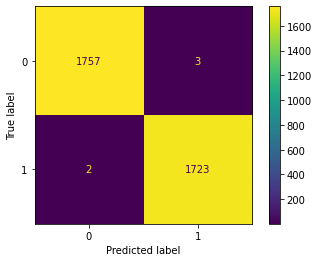

In [23]:
# Gradient Boosting Classifier
clf_XG = GradientBoostingClassifier() # Building a  model
clf_XG.fit(x_train, y_train) # Training a  model
y_pred_XG =  clf_XG.predict(x_test) # Make predictions

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_XG))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_XG))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_XG))

plot_confusion_matrix(clf_XG, x_test, y_test)  
plt.show()

Accuracy Score on test data:   1.0
Confusion Matrix of test data:
 [[1760    0]
 [   0 1725]]
classification report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00      1725

    accuracy                           1.00      3485
   macro avg       1.00      1.00      1.00      3485
weighted avg       1.00      1.00      1.00      3485



C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


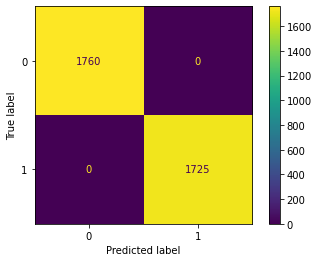

In [24]:
# Random Forest Classifier
clf_RF = RandomForestClassifier() # Building a  model
clf_RF.fit(x_train, y_train) # Training a  model
y_pred_RF =  clf_RF.predict(x_test) # Make predictions

# Evaluate the model on the test dataset
print('Accuracy Score on test data:  ', accuracy_score(y_true=y_test, y_pred=y_pred_RF))
print('Confusion Matrix of test data:\n', confusion_matrix(y_true=y_test, y_pred=y_pred_RF))
print('classification report on test data')
print(classification_report(y_true=y_test, y_pred=y_pred_RF))

plot_confusion_matrix(clf_RF, x_test, y_test)  
plt.show()

Baseline (random guess): ROC AUC=0.500
Decision Tree: ROC AUC=1.000
Gradient Boosting: ROC AUC=1.000
Random Forest: ROC AUC=1.000


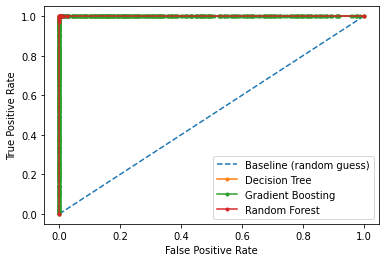

In [25]:
# ROC Curve for Decision Tree, Gradient Boosting and Random Forest

# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities for different models
lr_probs1 = clf1_DT.predict_proba(x_test)
lr_probs2 = clf_XG.predict_proba(x_test)
lr_probs3 = clf_RF.predict_proba(x_test)

# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
lr_probs3 = lr_probs3[:, 1]

# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)
lr_auc3 = roc_auc_score(y_test, lr_probs3)

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc1))
print('Gradient Boosting: ROC AUC=%.3f' % (lr_auc2))
print('Random Forest: ROC AUC=%.3f' % (lr_auc3))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Decision Tree')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label='Gradient Boosting')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

DecisionTreeClassifier: 1.000000 (0.000000)
GradientBoostingClassifier: 0.996939 (0.001406)
RandomForestClassifier: 1.000000 (0.000000)


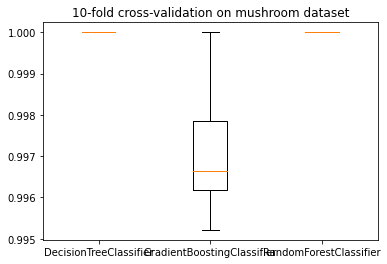

In [26]:
# Comparison of results for Decision Tree, Gradient Boosting and Random Forest Classifiers with 10 folds cross validation

# Spot Check Algorithms
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('10-fold cross-validation on mushroom dataset')
plt.show()

## Naive Bayes

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [28]:
model = GaussianNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [29]:
print("Model score:",model.score(x_test,y_test))
print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Accuracy score:",accuracy_score(pred,y_test))

Model score: 0.9730989956958394
Mean absolute error: 0.02690100430416069
Accuracy score: 0.9730989956958394


In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1407
           1       0.97      0.97      0.97      1381

    accuracy                           0.97      2788
   macro avg       0.97      0.97      0.97      2788
weighted avg       0.97      0.97      0.97      2788



In [31]:
print("Confusion Matrix\n:", confusion_matrix(y_test,pred))
pred_prob = model.predict_proba(x_test)
print("ROC_AUC score:\n", roc_auc_score(y_test, pred_prob[:,1]))

Confusion Matrix
: [[1372   35]
 [  40 1341]]
ROC_AUC score:
 0.9941371038672367


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


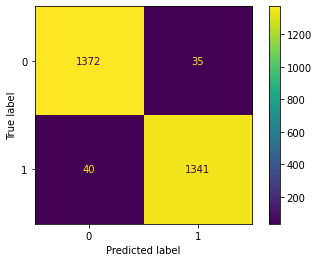

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


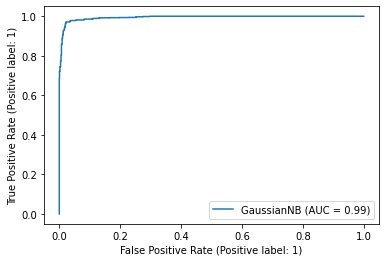

In [33]:
plot_roc_curve(model, x_test, y_test)

Model score: 0.9992826398852224
Mean absolute error: 0.0007173601147776184
Accuracy score: 0.9992826398852224
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       1.00      1.00      1.00      1381

    accuracy                           1.00      2788
   macro avg       1.00      1.00      1.00      2788
weighted avg       1.00      1.00      1.00      2788

Confusion Matrix
: [[1407    0]
 [   2 1379]]
ROC_AUC score:
 0.999998970699415


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


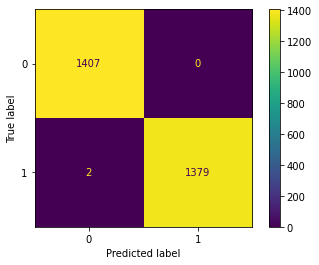

C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


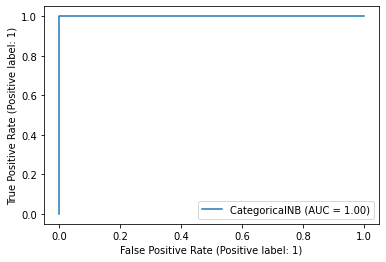

In [34]:
model2 = CategoricalNB()
model2.fit(x_train,y_train)
nb_pred1 = model2.predict(x_test)
print("Model score:",model2.score(x_test,y_test))
print("Mean absolute error:",mean_absolute_error(nb_pred1,y_test))
print("Accuracy score:",accuracy_score(nb_pred1,y_test))
print(classification_report(y_test,nb_pred1))
print("Confusion Matrix\n:", confusion_matrix(y_test,nb_pred1))
nb_pred_prob1 = model2.predict_proba(x_test)
print("ROC_AUC score:\n", roc_auc_score(y_test, nb_pred_prob1[:,1]))
plot_confusion_matrix(model2, x_test, y_test)  
plt.show()
plot_roc_curve(model2, x_test, y_test)

Gaussian NB:
 0.970139 (0.004471)
Confusion Matrix:
 [[1371   36]
 [  38 1343]]
Mean absolute error: 0.02654232424677188
Accuracy score: 0.9734576757532282
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1407
           1       0.97      0.97      0.97      1381

    accuracy                           0.97      2788
   macro avg       0.97      0.97      0.97      2788
weighted avg       0.97      0.97      0.97      2788



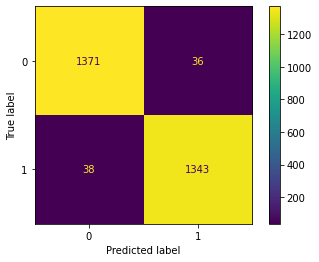

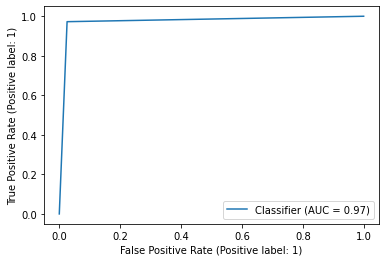

Categorical NB:
 0.997220 (0.001723)
Confusion Matrix:
 [[1370   37]
 [  46 1335]]
Mean absolute error: 0.02977044476327116
Accuracy score: 0.9702295552367288
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1407
           1       0.97      0.97      0.97      1381

    accuracy                           0.97      2788
   macro avg       0.97      0.97      0.97      2788
weighted avg       0.97      0.97      0.97      2788



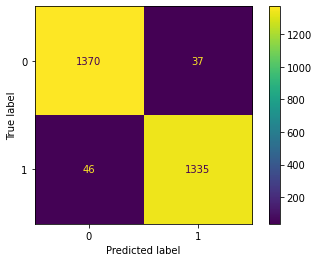

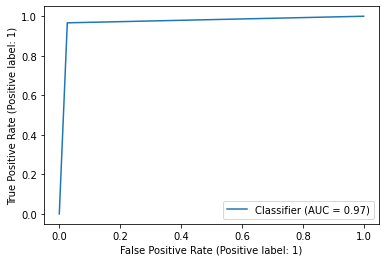

In [41]:
models = []
models.append(('Gaussian NB', GaussianNB()))
models.append(('Categorical NB', CategoricalNB()))

# evaluate each model in turn
results = []
names = []
prob = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    cv_pred = cross_val_predict(model,x_test, y_test, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print('%s:\n %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("Confusion Matrix:\n", confusion_matrix(y_test,cv_pred))
    print("Mean absolute error:",mean_absolute_error(cv_pred,y_test))
    print("Accuracy score:",accuracy_score(cv_pred,y_test))
    print(classification_report(y_test,cv_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,cv_pred))
    disp.plot()
    plt.show()
    RocCurveDisplay.from_predictions(y_test, cv_pred)
    plt.show()

## SVM

In [42]:
classifier = SVC()
classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1407
           1       0.98      0.98      0.98      1381

    accuracy                           0.98      2788
   macro avg       0.98      0.98      0.98      2788
weighted avg       0.98      0.98      0.98      2788




C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[1383   24]
 [  26 1355]]


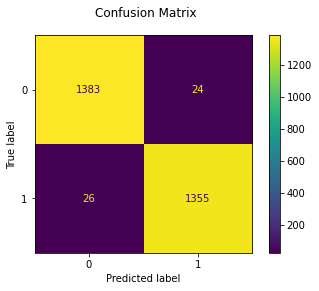

In [43]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [44]:
name="SVM"
kfold = StratifiedKFold(n_splits=10)
cv_results = cross_val_score(classifier, x_train, y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.978838 (0.002307)


In [45]:
svc_params = {"C": np.arange(1,10),
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf' ,"linear"]
             }

svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [46]:
print("best score:" + str(svc_cv_model.best_score_))
print("The best parameters: " + str(svc_cv_model.best_params_))

best score:1.0
The best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [47]:
svc_tuned = SVC(kernel = "rbf", C = 1 , gamma = 1).fit(x_train, y_train)

In [48]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

Classification report for classifier SVC(C=1, gamma=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       1.00      1.00      1.00      1381

    accuracy                           1.00      2788
   macro avg       1.00      1.00      1.00      2788
weighted avg       1.00      1.00      1.00      2788




C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[1407    0]
 [   0 1381]]


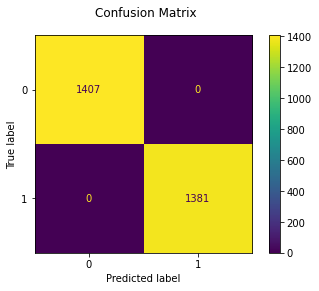

In [49]:
print("Classification report for classifier %s:\n%s\n"
      % (svc_tuned, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(svc_tuned, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [51]:
classifier = SVC()
classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1752
           1       0.97      0.98      0.98      1733

    accuracy                           0.98      3485
   macro avg       0.98      0.98      0.98      3485
weighted avg       0.98      0.98      0.98      3485


Confusion matrix:
[[1708   44]
 [  29 1704]]


C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


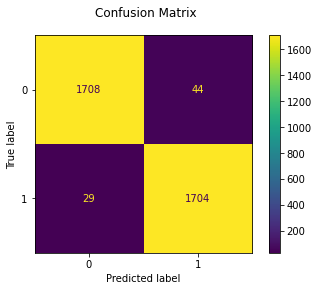

In [52]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [53]:
name="SVM"
kfold = StratifiedKFold(n_splits=10)
cv_results = cross_val_score(classifier, x_train, y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.980200 (0.003346)


In [54]:
svc_params = {"C": np.arange(1,10),
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf' ,"linear"]
             }

svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [55]:
print("best score:" + str(svc_cv_model.best_score_))
print("The best parameters: " + str(svc_cv_model.best_params_))

best score:1.0
The best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [56]:
svc_tuned = SVC(kernel = "rbf", C = 1 , gamma = 1).fit(x_train, y_train)

In [57]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

Classification report for classifier SVC(C=1, gamma=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1752
           1       1.00      1.00      1.00      1733

    accuracy                           1.00      3485
   macro avg       1.00      1.00      1.00      3485
weighted avg       1.00      1.00      1.00      3485




C:\Users\Preethi\Documents\Uni of Surrey\Semester 1\Machine Learning and Data Mining\Course Work\CW_Codes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[1752    0]
 [   0 1733]]


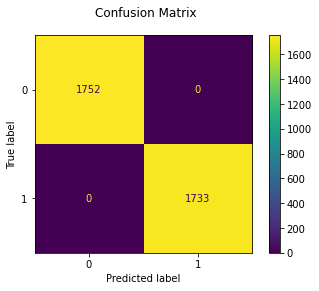

In [58]:
print("Classification report for classifier %s:\n%s\n"
      % (svc_tuned, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(svc_tuned, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
plt.show()

In [59]:
 print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

roc_auc_score:  1.0


In [60]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

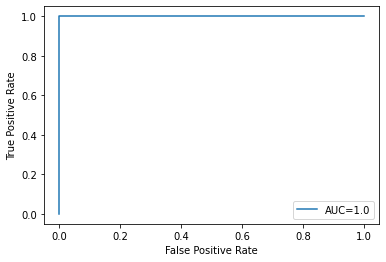

In [61]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Neural Network

In [62]:
def print_report(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix : \n',cm)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[0,1]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(y_test,y_pred,labels=[0,1])
    print('Classification report : \n',matrix)

    #plot confusion matrix
    # sns.heatmap(cm, annot=True)
    # plt.title("Confusion Matrix")
    # plt.show()

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    #roc-auc
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()    

### (a)Multi-Layer Perceptron

In [63]:
clf3 = MLPClassifier(random_state=0, activation='relu', hidden_layer_sizes=(2,), max_iter=100)
clf3.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(2,), max_iter=100, random_state=0)

In [64]:
lr_probs3 = clf3.predict(x_test)
lr_auc3 = roc_auc_score(y_test, lr_probs3)
print('MLP 3 (hidden layer sizes=20): ROC AUC=%.3f' % (lr_auc3))
lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)

MLP 3 (hidden layer sizes=20): ROC AUC=0.973


Confusion matrix : 
 [[1705   47]
 [  46 1687]]
Outcome values : 
 1705 47 46 1687
Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1752
           1       0.97      0.97      0.97      1733

    accuracy                           0.97      3485
   macro avg       0.97      0.97      0.97      3485
weighted avg       0.97      0.97      0.97      3485



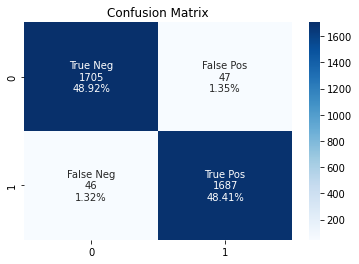

0.9733149749556684


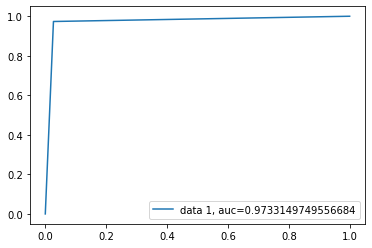

In [65]:
print_report(y_test, lr_probs3)

### (b)Perceptron

In [83]:
pptn = Perceptron(eta0=0.1, random_state=1, max_iter=400)
pptn.fit(x_train, y_train)
pptn_pred = pptn.predict(x_test)

Confusion matrix : 
 [[1752    0]
 [ 407 1326]]
Outcome values : 
 1752 0 407 1326
Classification report : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1752
           1       1.00      0.77      0.87      1733

    accuracy                           0.88      3485
   macro avg       0.91      0.88      0.88      3485
weighted avg       0.91      0.88      0.88      3485



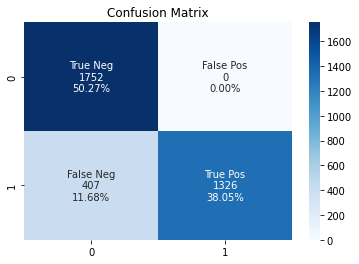

0.8825735718407386


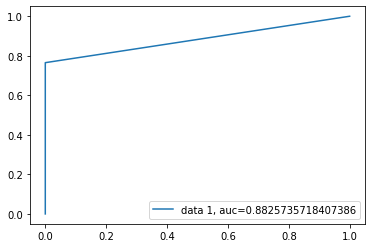

In [84]:
print_report(y_test, pptn_pred)

### (c) Densely Connected Neural Network

In [68]:
def build_classifier():
    classifier = Sequential()  # initialize neural network architecture
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu", input_dim=x_train.shape[1]))
    classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))  # kernel_initializer: to initialize weights
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))  # output layer
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

In [69]:
classifier = KerasClassifier(build_fn=build_classifier)
folds = KFold(n_splits=10, random_state=1, shuffle=True).split(x_train, y_train)
histories = []
for train_ids, test_ids in folds:
#     classifier.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=128, verbose=1)
    
    x_train_fold = x_train.iloc[train_ids]
    y_train_fold = y_train.iloc[train_ids]
    x_test_fold = x_train.iloc[test_ids]
    y_test_fold = y_train.iloc[test_ids]
    history = classifier.fit(x_train_fold, y_train_fold, validation_data=(x_test_fold, y_test_fold), epochs=100, batch_size=128, verbose=1)
    histories.append(history)

C:\Users\Preethi\AppData\Local\Temp/ipykernel_20664/3529706994.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  classifier = KerasClassifier(build_fn=build_classifier)


Epoch 1/100
74/74 [==============================] - 1s 4ms/step - loss: 0.6704 - accuracy: 0.5801 - val_loss: 0.5996 - val_accuracy: 0.8126
Epoch 2/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.8753 - val_loss: 0.4007 - val_accuracy: 0.9398
Epoch 3/100
74/74 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.9538 - val_loss: 0.3322 - val_accuracy: 0.9732
Epoch 4/100
74/74 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.9660 - val_loss: 0.2893 - val_accuracy: 0.9771
Epoch 5/100
74/74 [==============================] - 0s 3ms/step - loss: 0.2864 - accuracy: 0.9690 - val_loss: 0.2569 - val_accuracy: 0.9742
Epoch 6/100
74/74 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.9693 - val_loss: 0.2304 - val_accuracy: 0.9742
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9695 - val_loss: 0.2038 - val_accuracy: 0.9742
Epoch 8/100
7

Epoch 59/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.9701 - val_loss: 0.0601 - val_accuracy: 0.9713
Epoch 60/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9683 - val_loss: 0.0577 - val_accuracy: 0.9723
Epoch 61/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 0.9668 - val_loss: 0.0598 - val_accuracy: 0.9656
Epoch 62/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9681 - val_loss: 0.0590 - val_accuracy: 0.9694
Epoch 63/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9688 - val_loss: 0.0568 - val_accuracy: 0.9742
Epoch 64/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9694 - val_loss: 0.0592 - val_accuracy: 0.9685
Epoch 65/100
74/74 [==============================] - 0s 3ms/step - loss: 0.0663 - accuracy: 0.9688 - val_loss: 0.0594 - val_accuracy: 0.9694
Epoch 

Epoch 17/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 0.9695 - val_loss: 0.0922 - val_accuracy: 0.9685
Epoch 18/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9697 - val_loss: 0.0894 - val_accuracy: 0.9685
Epoch 19/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9698 - val_loss: 0.0906 - val_accuracy: 0.9685
Epoch 20/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.9703 - val_loss: 0.0887 - val_accuracy: 0.9713
Epoch 21/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.9698 - val_loss: 0.0898 - val_accuracy: 0.9685
Epoch 22/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9692 - val_loss: 0.0892 - val_accuracy: 0.9685
Epoch 23/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.9694 - val_loss: 0.0948 - val_accuracy: 0.9694
Epoch 

Epoch 75/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9702 - val_loss: 0.0888 - val_accuracy: 0.9685
Epoch 76/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9695 - val_loss: 0.0951 - val_accuracy: 0.9685
Epoch 77/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.9702 - val_loss: 0.0888 - val_accuracy: 0.9685
Epoch 78/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9699 - val_loss: 0.0958 - val_accuracy: 0.9685
Epoch 79/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9697 - val_loss: 0.0916 - val_accuracy: 0.9685
Epoch 80/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9692 - val_loss: 0.0883 - val_accuracy: 0.9685
Epoch 81/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9694 - val_loss: 0.0898 - val_accuracy: 0.9685
Epoch 

Epoch 33/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1019 - accuracy: 0.9710 - val_loss: 0.1090 - val_accuracy: 0.9656
Epoch 34/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1031 - accuracy: 0.9692 - val_loss: 0.1083 - val_accuracy: 0.9665
Epoch 35/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9698 - val_loss: 0.1086 - val_accuracy: 0.9656
Epoch 36/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9696 - val_loss: 0.1102 - val_accuracy: 0.9656
Epoch 37/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1015 - accuracy: 0.9700 - val_loss: 0.1188 - val_accuracy: 0.9627
Epoch 38/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1016 - accuracy: 0.9707 - val_loss: 0.1124 - val_accuracy: 0.9656
Epoch 39/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1031 - accuracy: 0.9700 - val_loss: 0.1124 - val_accuracy: 0.9656
Epoch 

Epoch 91/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1022 - accuracy: 0.9702 - val_loss: 0.1110 - val_accuracy: 0.9656
Epoch 92/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9696 - val_loss: 0.1078 - val_accuracy: 0.9675
Epoch 93/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1013 - accuracy: 0.9703 - val_loss: 0.1140 - val_accuracy: 0.9656
Epoch 94/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.9707 - val_loss: 0.1131 - val_accuracy: 0.9656
Epoch 95/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9707 - val_loss: 0.1167 - val_accuracy: 0.9627
Epoch 96/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1023 - accuracy: 0.9702 - val_loss: 0.1135 - val_accuracy: 0.9656
Epoch 97/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.9698 - val_loss: 0.1091 - val_accuracy: 0.9656
Epoch 

Epoch 49/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9693 - val_loss: 0.0914 - val_accuracy: 0.9732
Epoch 50/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9698 - val_loss: 0.0911 - val_accuracy: 0.9732
Epoch 51/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9699 - val_loss: 0.0958 - val_accuracy: 0.9704
Epoch 52/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1042 - accuracy: 0.9691 - val_loss: 0.0910 - val_accuracy: 0.9732
Epoch 53/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9696 - val_loss: 0.0909 - val_accuracy: 0.9732
Epoch 54/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9689 - val_loss: 0.0910 - val_accuracy: 0.9732
Epoch 55/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.9693 - val_loss: 0.0913 - val_accuracy: 0.9732
Epoch 

Epoch 7/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9701 - val_loss: 0.1222 - val_accuracy: 0.9694
Epoch 8/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1042 - accuracy: 0.9696 - val_loss: 0.1201 - val_accuracy: 0.9694
Epoch 9/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9700 - val_loss: 0.1195 - val_accuracy: 0.9694
Epoch 10/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9698 - val_loss: 0.1192 - val_accuracy: 0.9694
Epoch 11/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1018 - accuracy: 0.9702 - val_loss: 0.1291 - val_accuracy: 0.9665
Epoch 12/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9694 - val_loss: 0.1180 - val_accuracy: 0.9665
Epoch 13/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9711 - val_loss: 0.1269 - val_accuracy: 0.9694
Epoch 14/

Epoch 65/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9695 - val_loss: 0.1168 - val_accuracy: 0.9694
Epoch 66/100
74/74 [==============================] - 0s 5ms/step - loss: 0.1008 - accuracy: 0.9698 - val_loss: 0.1167 - val_accuracy: 0.9694
Epoch 67/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1008 - accuracy: 0.9702 - val_loss: 0.1175 - val_accuracy: 0.9694
Epoch 68/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1017 - accuracy: 0.9698 - val_loss: 0.1219 - val_accuracy: 0.9694
Epoch 69/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1024 - accuracy: 0.9692 - val_loss: 0.1187 - val_accuracy: 0.9694
Epoch 70/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1007 - accuracy: 0.9692 - val_loss: 0.1164 - val_accuracy: 0.9694
Epoch 71/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9698 - val_loss: 0.1162 - val_accuracy: 0.9685
Epoch 

Epoch 23/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1038 - accuracy: 0.9704 - val_loss: 0.1050 - val_accuracy: 0.9646
Epoch 24/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1042 - accuracy: 0.9694 - val_loss: 0.1024 - val_accuracy: 0.9665
Epoch 25/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9696 - val_loss: 0.1036 - val_accuracy: 0.9675
Epoch 26/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9699 - val_loss: 0.1067 - val_accuracy: 0.9656
Epoch 27/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9696 - val_loss: 0.1022 - val_accuracy: 0.9665
Epoch 28/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9695 - val_loss: 0.1092 - val_accuracy: 0.9675
Epoch 29/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.9698 - val_loss: 0.1021 - val_accuracy: 0.9665
Epoch 

Epoch 81/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1015 - accuracy: 0.9699 - val_loss: 0.1027 - val_accuracy: 0.9675
Epoch 82/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1025 - accuracy: 0.9697 - val_loss: 0.1049 - val_accuracy: 0.9675
Epoch 83/100
74/74 [==============================] - 0s 5ms/step - loss: 0.1039 - accuracy: 0.9694 - val_loss: 0.1018 - val_accuracy: 0.9665
Epoch 84/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9699 - val_loss: 0.1069 - val_accuracy: 0.9684
Epoch 85/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9695 - val_loss: 0.1024 - val_accuracy: 0.9665
Epoch 86/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1032 - accuracy: 0.9698 - val_loss: 0.1058 - val_accuracy: 0.9675
Epoch 87/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9697 - val_loss: 0.1024 - val_accuracy: 0.9684
Epoch 

Epoch 39/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.9704 - val_loss: 0.1084 - val_accuracy: 0.9656
Epoch 40/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1023 - accuracy: 0.9702 - val_loss: 0.1086 - val_accuracy: 0.9656
Epoch 41/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.9701 - val_loss: 0.1101 - val_accuracy: 0.9656
Epoch 42/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9702 - val_loss: 0.1121 - val_accuracy: 0.9722
Epoch 43/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9702 - val_loss: 0.1083 - val_accuracy: 0.9656
Epoch 44/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1032 - accuracy: 0.9708 - val_loss: 0.1091 - val_accuracy: 0.9694
Epoch 45/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1033 - accuracy: 0.9695 - val_loss: 0.1097 - val_accuracy: 0.9694
Epoch 

Epoch 97/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1022 - accuracy: 0.9695 - val_loss: 0.1084 - val_accuracy: 0.9656
Epoch 98/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9700 - val_loss: 0.1084 - val_accuracy: 0.9656
Epoch 99/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1018 - accuracy: 0.9699 - val_loss: 0.1091 - val_accuracy: 0.9656
Epoch 100/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1010 - accuracy: 0.9704 - val_loss: 0.1083 - val_accuracy: 0.9656
Epoch 1/100
74/74 [==============================] - 1s 6ms/step - loss: 0.6632 - accuracy: 0.7390 - val_loss: 0.5892 - val_accuracy: 0.8019
Epoch 2/100
74/74 [==============================] - 0s 5ms/step - loss: 0.4856 - accuracy: 0.8844 - val_loss: 0.4166 - val_accuracy: 0.9311
Epoch 3/100
74/74 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.9556 - val_loss: 0.3651 - val_accuracy: 0.9541
Epoch 4/

Epoch 55/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.9660 - val_loss: 0.1134 - val_accuracy: 0.9665
Epoch 56/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.9667 - val_loss: 0.1133 - val_accuracy: 0.9569
Epoch 57/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1088 - accuracy: 0.9663 - val_loss: 0.1150 - val_accuracy: 0.9665
Epoch 58/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1080 - accuracy: 0.9656 - val_loss: 0.1102 - val_accuracy: 0.9598
Epoch 59/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.9641 - val_loss: 0.1097 - val_accuracy: 0.9675
Epoch 60/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9658 - val_loss: 0.1080 - val_accuracy: 0.9608
Epoch 61/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9655 - val_loss: 0.1096 - val_accuracy: 0.9665
Epoch 

Epoch 13/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.9702 - val_loss: 0.1013 - val_accuracy: 0.9703
Epoch 14/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9696 - val_loss: 0.0979 - val_accuracy: 0.9742
Epoch 15/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1051 - accuracy: 0.9696 - val_loss: 0.1131 - val_accuracy: 0.9713
Epoch 16/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1051 - accuracy: 0.9693 - val_loss: 0.1061 - val_accuracy: 0.9703
Epoch 17/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1035 - accuracy: 0.9696 - val_loss: 0.1032 - val_accuracy: 0.9703
Epoch 18/100
74/74 [==============================] - 0s 5ms/step - loss: 0.1040 - accuracy: 0.9692 - val_loss: 0.1033 - val_accuracy: 0.9703
Epoch 19/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9697 - val_loss: 0.1012 - val_accuracy: 0.9703
Epoch 

Epoch 71/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 0.9694 - val_loss: 0.0996 - val_accuracy: 0.9703
Epoch 72/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1032 - accuracy: 0.9704 - val_loss: 0.0985 - val_accuracy: 0.9703
Epoch 73/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.9690 - val_loss: 0.1007 - val_accuracy: 0.9703
Epoch 74/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1031 - accuracy: 0.9698 - val_loss: 0.0998 - val_accuracy: 0.9703
Epoch 75/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.9697 - val_loss: 0.1077 - val_accuracy: 0.9713
Epoch 76/100
74/74 [==============================] - 0s 5ms/step - loss: 0.1024 - accuracy: 0.9694 - val_loss: 0.1166 - val_accuracy: 0.9636
Epoch 77/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9685 - val_loss: 0.1008 - val_accuracy: 0.9703
Epoch 

Epoch 29/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1056 - accuracy: 0.9683 - val_loss: 0.0978 - val_accuracy: 0.9761
Epoch 30/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9691 - val_loss: 0.0973 - val_accuracy: 0.9751
Epoch 31/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9692 - val_loss: 0.0964 - val_accuracy: 0.9751
Epoch 32/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9685 - val_loss: 0.0966 - val_accuracy: 0.9761
Epoch 33/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9695 - val_loss: 0.0972 - val_accuracy: 0.9751
Epoch 34/100
74/74 [==============================] - 0s 5ms/step - loss: 0.1046 - accuracy: 0.9693 - val_loss: 0.0973 - val_accuracy: 0.9761
Epoch 35/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1038 - accuracy: 0.9691 - val_loss: 0.1014 - val_accuracy: 0.9713
Epoch 

Epoch 87/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9693 - val_loss: 0.0958 - val_accuracy: 0.9751
Epoch 88/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.9689 - val_loss: 0.0957 - val_accuracy: 0.9751
Epoch 89/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1033 - accuracy: 0.9691 - val_loss: 0.0967 - val_accuracy: 0.9751
Epoch 90/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9684 - val_loss: 0.0957 - val_accuracy: 0.9751
Epoch 91/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.9690 - val_loss: 0.0956 - val_accuracy: 0.9751
Epoch 92/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9691 - val_loss: 0.0962 - val_accuracy: 0.9751
Epoch 93/100
74/74 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9689 - val_loss: 0.0958 - val_accuracy: 0.9751
Epoch 

In [70]:
y_pred = classifier.predict(x_test)

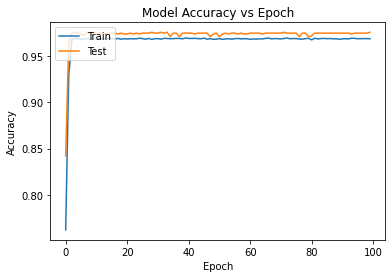

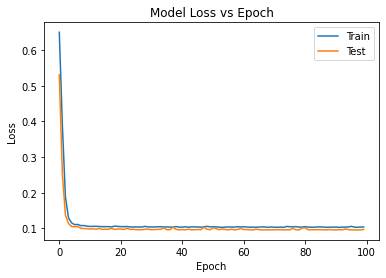

In [71]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


Confusion matrix : 
 [[1705   47]
 [  44 1689]]
Outcome values : 
 1705 47 44 1689
Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1752
           1       0.97      0.97      0.97      1733

    accuracy                           0.97      3485
   macro avg       0.97      0.97      0.97      3485
weighted avg       0.97      0.97      0.97      3485



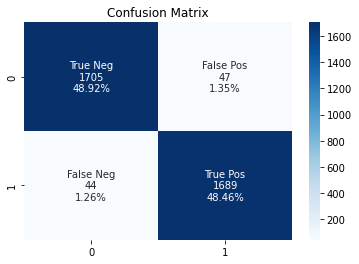

0.9738920090006772


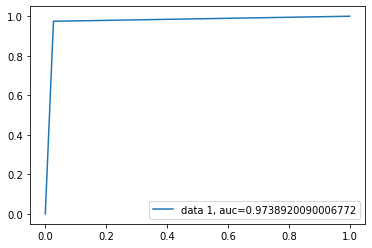

In [72]:
# confusion matrix
print_report(y_test, y_pred)

<h1>K-Means and PCA </h1>

<p> It is a categorical dataset with two features each having 55 unique categories.
    No null values</p>

In [8]:
#splitting data into independent and dependent variables
y = pyrimidines_data['activity']
X = pyrimidines_data.drop(['activity'] , axis  = 1)

In [9]:
#using get dummies to encode the features
X = pd.get_dummies(X)

In [10]:
#encoding target labels
y = y.map(dict(great=1, less=0))
y.head()

0    1
1    1
2    1
3    1
4    1
Name: activity, dtype: int64

**Evaluating Performace Metrics with PCA for Dimensionality Reduction**

A table comparing the the performance of K-means clustering algorithm with and without the dimension reductions using PCA (with r=48, r=24 and r=2) according to different performance evaluation metrics (homogeneity score, completeness score, V measure, adjusted rand index, adjusted mutual information, and silhouette coefficient) is displayed. 

n_types: 2, 	 n_samples 13940, 	 n_features 110

-------------- Metrics before PCA -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	110	0.25s	1519180	0.003	0.024	0.006	0.000	0.006	0.010
__________________________________________________________________________________

-------------- Metrics after PCA with r=48 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	48	0.34s	679373	0.001	0.001	0.001	0.000	0.001	0.015
__________________________________________________________________________________

-------------- Metrics after PCA with r=24 -------------------
__________________________________________________________________________________
init		feat	time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	24	0.36s	336059	0.009	0.010	0.009	0

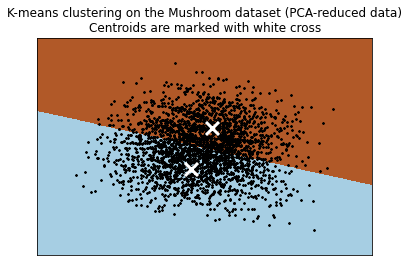

In [11]:
#The dataset initially contains 110 features after categorical encoding.
#PCA is used to reduce these features into a desired number of principle components to optimize performance.
#The optimal value is chosen by examining the metrics against the reduced data.

np.random.seed(407)

X_values = X
y_values = y
data = scale(X_values)

n_samples, n_features = data.shape
n_types = len(np.unique(y_values))
labels = y_values

sample_size = 300

print("n_types: %d, \t n_samples %d, \t n_features %d"
      % (n_types, n_samples, n_features))

print('\n-------------- Metrics before PCA -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    
        
    print('%-9s\t%i\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, data.shape[1],(time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    
bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=data)

#bench_k_means(KMeans(init='random init.', n_clusters=n_types, n_init=10),
#              name="random init.", data=data)

#
print(82 * '_')

print('\n-------------- Metrics after PCA with r=48 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data0 = PCA(n_components=48).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data0)

print(82 * '_')

print('\n-------------- Metrics after PCA with r=24 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data0 = PCA(n_components=24).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data0)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data0)

print(82 * '_')

print('\n-------------- Metrics after PCA with r=2 -------------------')
print(82 * '_')
print('init\t\tfeat\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data)


bench_k_means(KMeans(init='k-means++', n_clusters=n_types, n_init=10),
              name="k-means++", data=reduced_data)

#bench_k_means(KMeans(init='random init.', n_clusters=n_types, n_init=10),
#              name="random init", data=reduced_data)


# #############################################################################
# Visualize the results on PCA-reduced data

#reduced_data = PCA(n_components=2).fit_transform(data)
#kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
#kmeans.fit(reduced_data)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
kmeans = KMeans(init='k-means++', n_clusters=n_types, n_init=10)
kmeans.fit(reduced_data)
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Mushroom dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**Observation:**

There is a significant improvement in metrics, especially a significant rise of the silhoutte score for PCA where r is 2.

**Determining K value**

Different values of K ranging from 1 to 9 are used to calculate inertia (or total within-cluster sum of squares) and Average Silhouette score for each value of K.

Text(0, 0.5, 'Total within-cluster sum of squares')

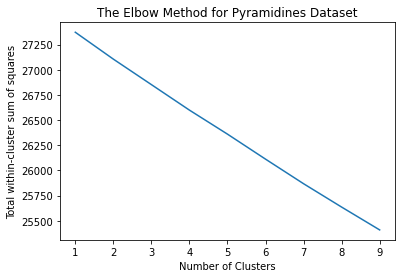

In [15]:
#To find appropriate k value
twss=[]
sa=[]

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    Ypreds=kmeans.predict(X)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(X, Ypreds))
plt.plot(range(1,10),twss)
plt.title('The Elbow Method for Pyramidines Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

In [ ]:
#Observation : There is no clear elbow bend for the data

Text(0, 0.5, 'Average silhouette score')

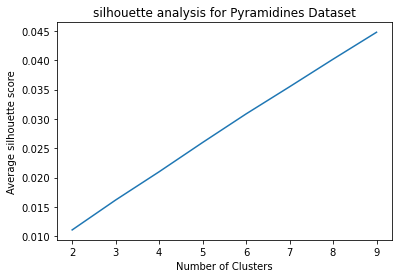

In [14]:
plt.plot(range(2,10),sa)
plt.title('silhouette analysis for Pyramidines Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

In [16]:
pca = PCA(n_components=2).fit(X)
pca_2 = pca.transform(X)

For n_clusters = 2 The average silhouette_score is : 0.010992259563464467


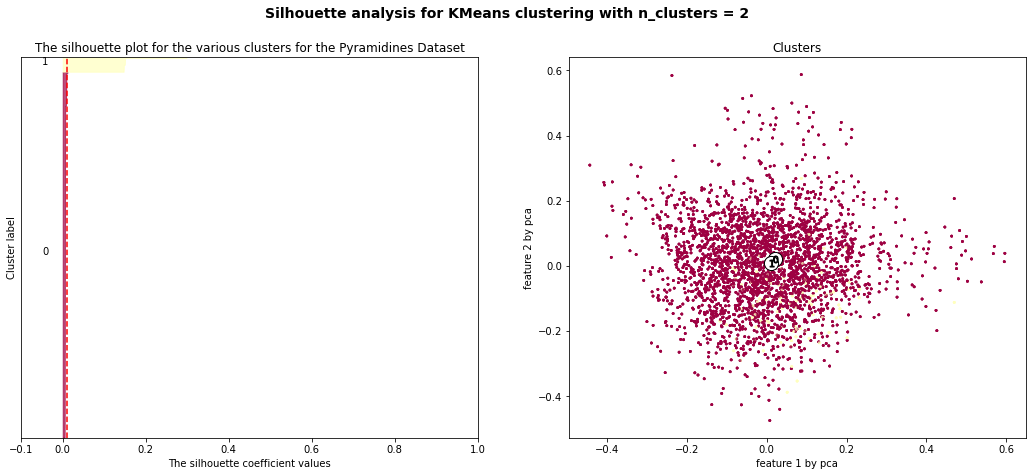

For n_clusters = 3 The average silhouette_score is : 0.016147401277814277


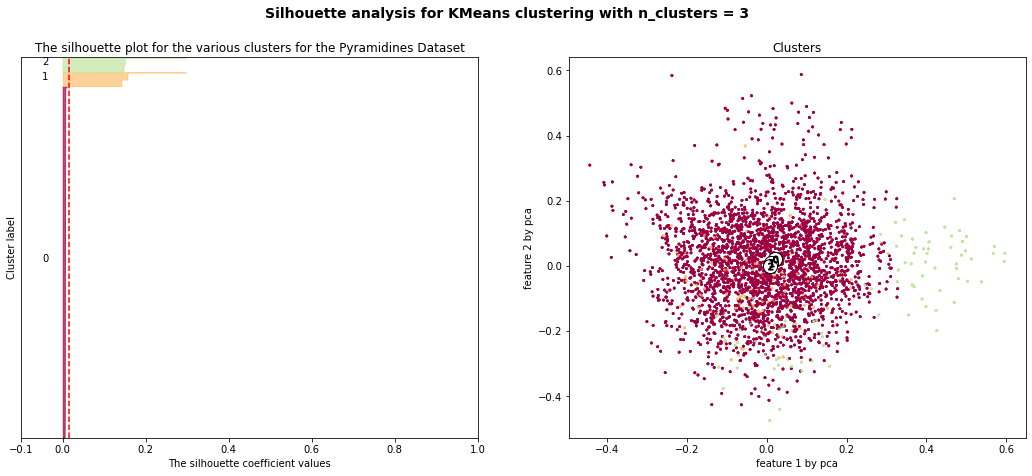

For n_clusters = 4 The average silhouette_score is : 0.02114829608800308


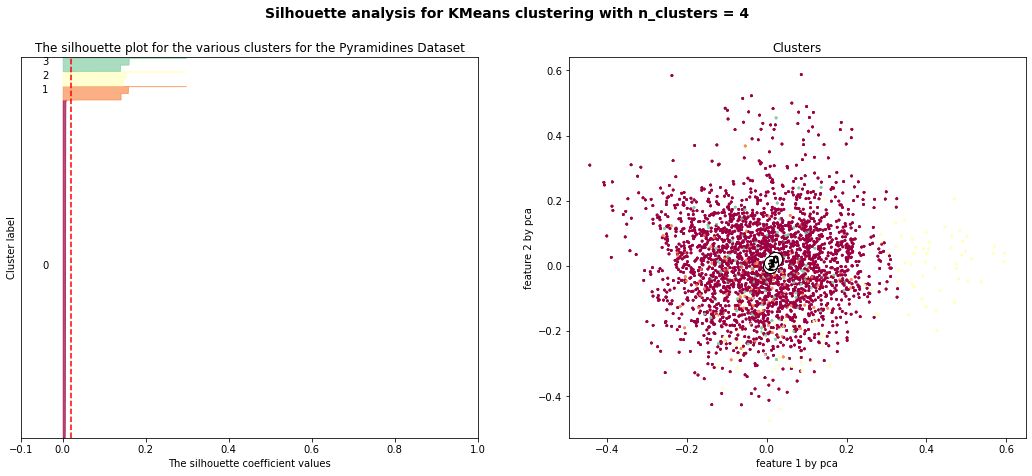

For n_clusters = 5 The average silhouette_score is : 0.025959158460301588


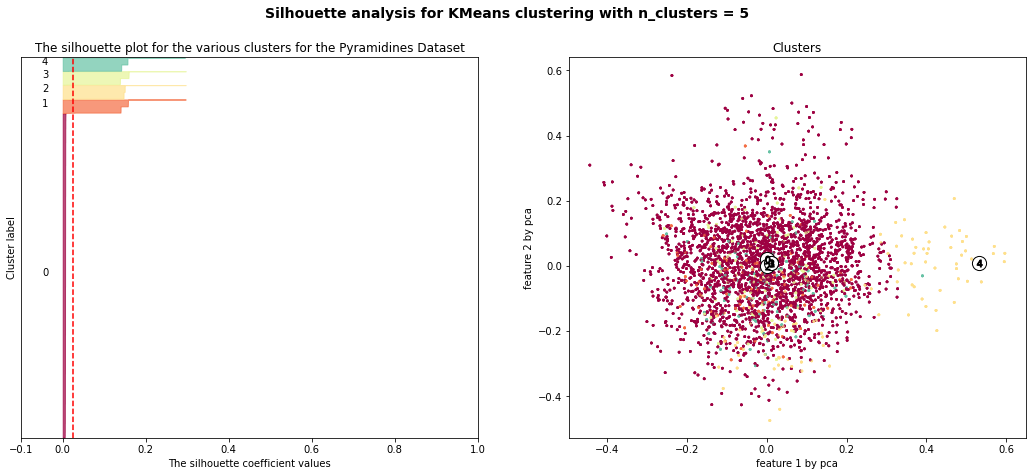

For n_clusters = 6 The average silhouette_score is : 0.030680637880343687


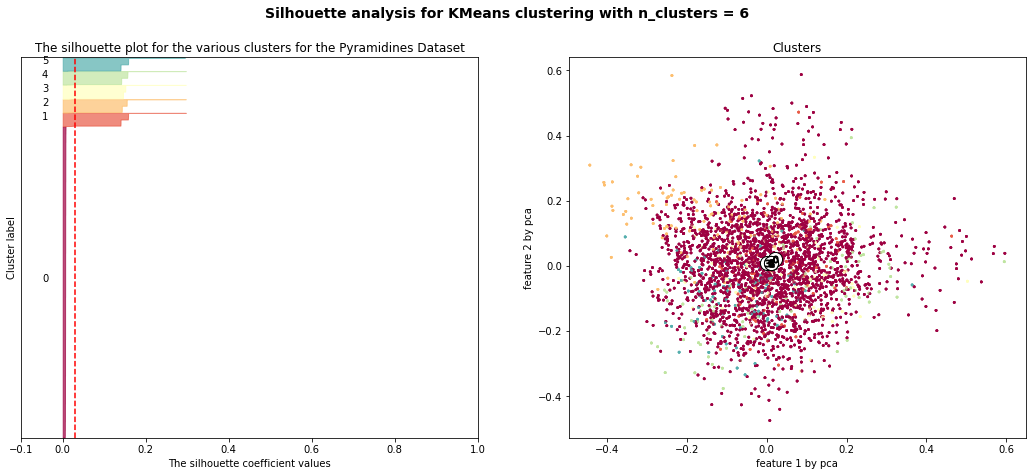

In [17]:
for n_clusters in range(2,7):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
    
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters for the Pyramidines Dataset")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2[:, 0], pca_2[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clusters")
    ax2.set_xlabel("feature 1 by pca")
    ax2.set_ylabel("feature 2 by pca")

    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

**Fitting and plotting clusters**

In [19]:
kmeans = KMeans(n_clusters=2, init= 'k-means++')
kmeans.fit(X)
Ypreds=kmeans.predict(X)

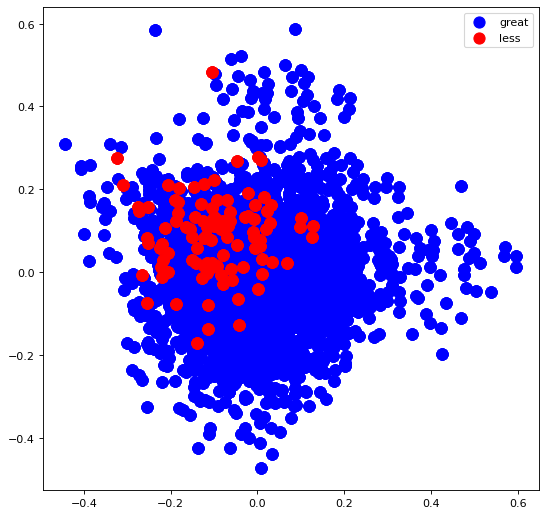

In [20]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(pca_2[Ypreds == 0, 0], pca_2[Ypreds == 0, 1], s = 100, c = 'blue', label = 'great')
plt.scatter(pca_2[Ypreds == 1, 0], pca_2[Ypreds == 1, 1], s = 100, c = 'red', label = 'less')
plt.legend()

<h2>Observation & Findings :</h2>
<p>
    Evidently, the K means algorithm is not suitable for performing clusering on a purely ordinal dataset. That is because, the integral part of k means clustering is to find minimal distance between various data points. When it comes to categorical data it becomes challenging to perform this task. Even though the data is encoded into numerical values, there is no weightage assigned to different attributes rendering it difficult to distingush between them. A way around this problem is to assign weights to different attributes during label encoding. However doing that required domain expertise and knowledge about the activity of Pyramidines in response to various combinations. </p>